<a href="https://colab.research.google.com/github/hstevans/Cirrhosis-Stroke-Predictions--Machine-Learning--Classification-Models/blob/main/Stroke_Predictions_Machine_Learning_Classification_Models_Part_2_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##***Stroke Predictions Machine Learning Classification Models*** 

By: Hollyann Stevans


Assignment:

clean and explore the data set:

* Deleted unnecessary columns.
* Deleted duplicate rows.
* Identified and addressed missing values.
* Identified and corrected inconsistencies in data for categorical values (i.e. Cat, cat, cats).
* Produced univariate visuals for the target and all features.
* Identified outliers.
* Clearly commented all of your cleaning steps and described any decisions you made.



###**Importing Libraries**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### **Load the Data**

###Uploading Data:

In [28]:
filename = ("/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv")
df = pd.read_csv(filename)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [30]:
# make a copy of the dataframe for machine learning use later

df2 = df.copy()

**1. Source of data:** https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**2. Brief description of data:**

  This dataset is used to predict whether a patient is likely to have a stroke
(target) 

  based on information about the patient (features) such as age, gender, bmi, etc.


**3. What is the target?** 

'stroke'

**4. What does one row represent? (A person?  A business?  An event? A product?)**

  Each row in the data provides relavant information about the patient.


**5. Is this a classification or regression problem?**

  This is a classification problem


**6. How many features does the data have?**

This data has 11 features.

**7. How many rows are in the dataset?**

There are 5,110 rows in the dataset.

**8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset?** 

I do not foresee any major issues with this dataset, maybe the number of rows could present an issue.

In [31]:
## Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 5110 rows, and 12 columns.
The rows represent 5110 observations, and the columns represent 11 features and 1 target variable.


In [32]:
## Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [33]:
## Display the descriptive statistics for the numeric columns
df.describe(include="number") # or 'object'

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [34]:
## Display the descriptive statistics for the numeric columns
df.describe(include="object") # or 'number'

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


## **Clean the Data**

### **Remove Unnecessary Columns**

- The 'id' is highly specific to each customer and is unnecessary. Keeping all other columns for now.


In [35]:
## Drop columns
df = df.drop(columns=['id'])

### **Inspect Column Names for Errors**

In [36]:
## Display column names
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

- No errors noted.

### **Inspect Values for Errors**

In [37]:
## Display the descriptive statistics for the non-numeric columns
df.describe(include="number")

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [38]:
df.value_counts()

gender  age    hypertension  heart_disease  ever_married  work_type      Residence_type  avg_glucose_level  bmi   smoking_status   stroke
Female  0.08   0             0              No            children       Urban           139.67             14.1  Unknown          0         1
Male    15.00  0             0              No            children       Rural           62.57              32.3  never smoked     0         1
                                                                         Urban           113.28             23.7  never smoked     0         1
                                                                                         95.86              18.1  Unknown          0         1
                                                                         Rural           205.50             24.2  never smoked     0         1
                                                                                                                                            ..
Fema

- No errors noted. bmi max seems a bit high, but would need to speak with a specialist on this to confirm if this is an incorrect or impossible value. Note: Anything over 30.0 for bmi is considered obese.

- No inconsistencies found in column values.

### **Missing Values**

In [39]:
## Display the total number of missing values
print(f'There are {df.isna().sum().sum()} missing values.')

There are 201 missing values.


In [40]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [41]:
## If there are missing values we could
## Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


###**Correct Missing Values**

In [42]:
# filling 'bmi' missing values with the median bmi.

median_bmi = df['bmi'].median()
df['bmi'].fillna(median_bmi, inplace=True)

*  Chose to fill missing bmi with the median because there were 201 missing and filling them in with the average gives you closet to the correct value without knowing the absolute correct values. 

###**Univariate Visuals**

In [43]:
#Looking at correlation between numeric data
corr = df.corr()
corr

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
age,1.000000,0.276398,0.263796,0.238171,0.324296,0.245257
hypertension,0.276398,1.000000,0.108306,0.174474,0.158293,0.127904
heart_disease,0.263796,0.108306,1.000000,0.161857,0.036916,0.134914
avg_glucose_level,0.238171,0.174474,0.161857,1.000000,0.166876,0.131945
bmi,0.324296,0.158293,0.036916,0.166876,1.000000,0.036110
stroke,0.245257,0.127904,0.134914,0.131945,0.036110,1.000000


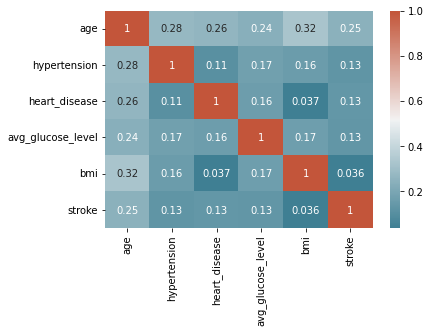

In [44]:
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True));


*   There is a slight positve correlation between, the target, stroke and age, stroke and hypertenstion, stroke and heart_disease, stroke adn avg_glucose_level
* There is a slight positve correlation between almost all of the features. 
* bmi and stroke, and bmi and heart_disease are the only features who do not really show a correlation.



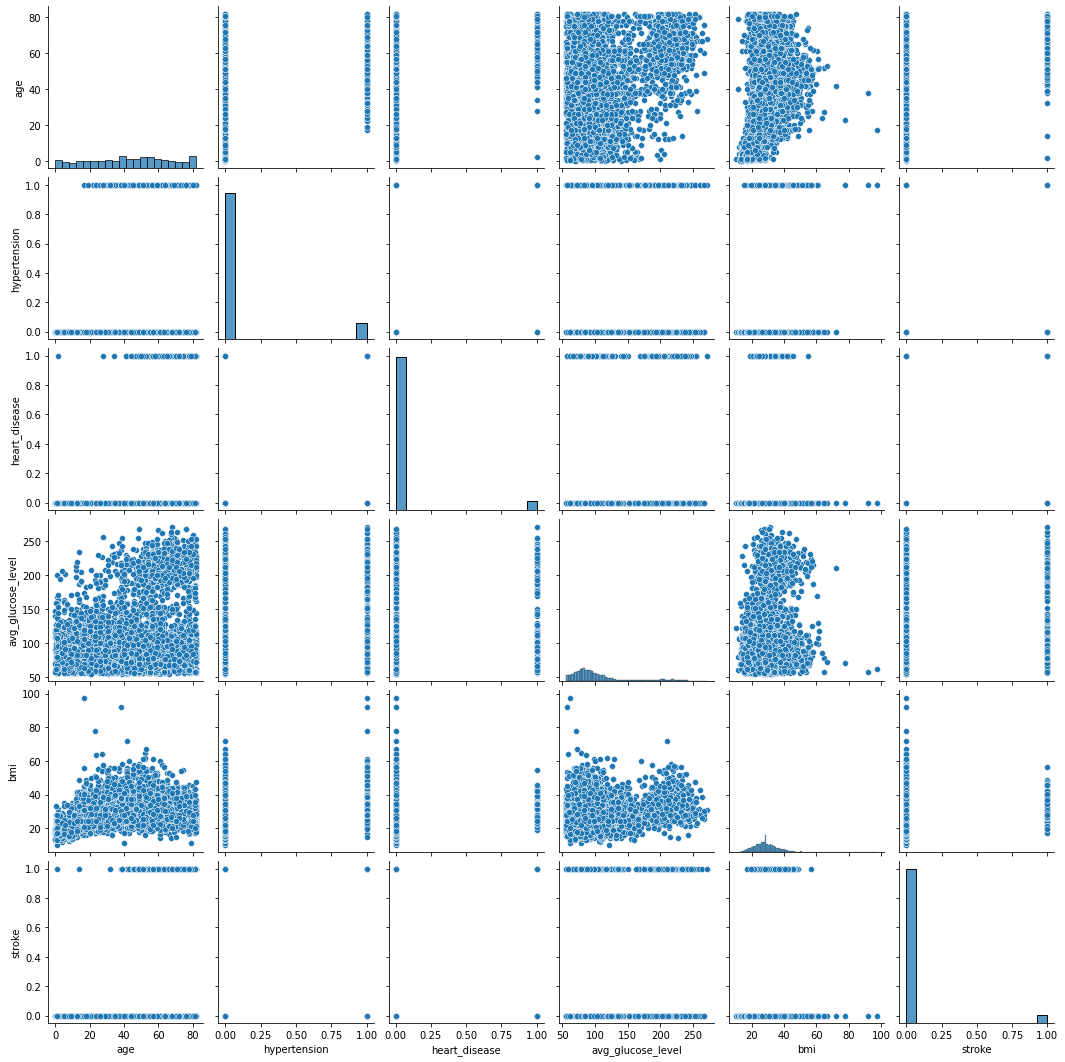

In [45]:
sns.pairplot(df);

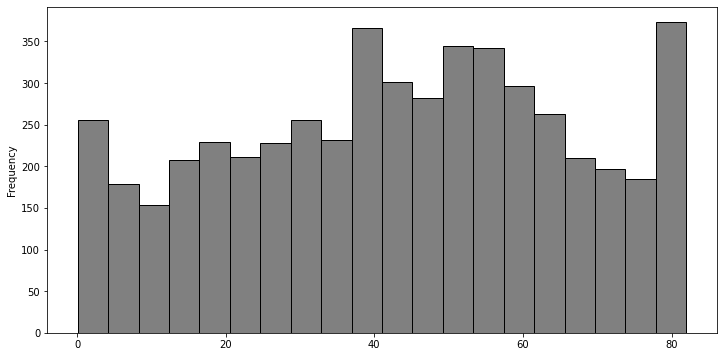

In [46]:
df['age'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black');

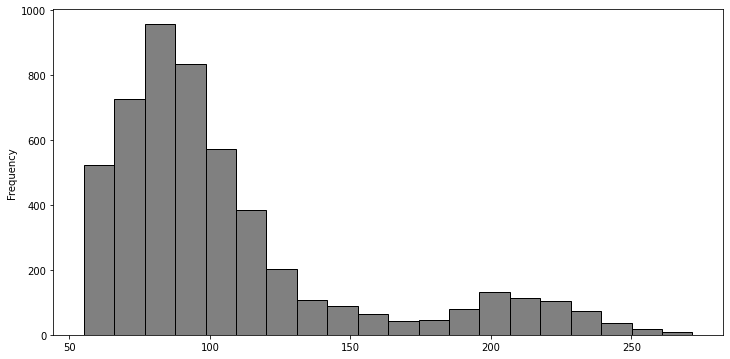

In [47]:
df['avg_glucose_level'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black');

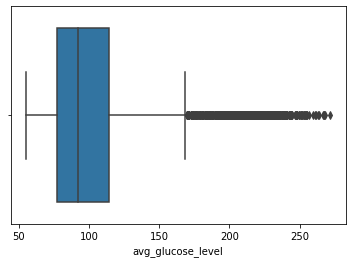

In [58]:
# boxplot with seaborn
sns.boxplot(data=df, x='avg_glucose_level');

*   This boxplot shows that the median avg_glucose_level is around 80.

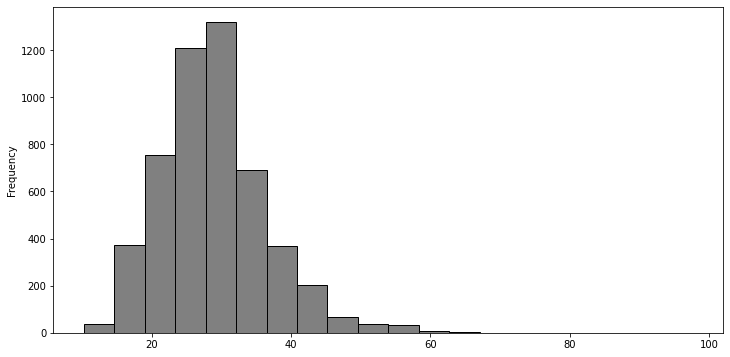

In [48]:
df['bmi'].plot(kind='hist', bins=20, figsize=(12,6), facecolor='grey',edgecolor='black');

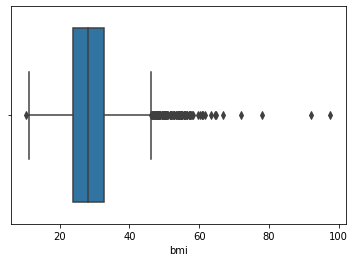

In [57]:
# boxplot with seaborn
sns.boxplot(data=df, x='bmi');



*   This bmi boxplot, shows outliers 
*   not sure how I want to handle these just yet, need to do more information on bmi



In [50]:
def plot_bar(data,x, y, figsize=(20,5)):
    ## Make a larger fig/ax before plotting
    fig, ax = plt.subplots(figsize=figsize)

    ## Plot barplot
    
    ## counts, counts up the categories, sort the values, then puts them in a 
    ## data frame.
    
    counts = df[x].value_counts().sort_values(ascending=False).to_frame()
    ## ploting the barplot

    sns.barplot(data=counts,x=counts.index, y = counts[x],ax=ax)

    plt.xticks(rotation= 90)
    ax.set_title(f'Categorical Frequencies of {y}', fontsize = 20, fontweight = 'bold');
    ax.set_xlabel(f'Categories for {y}', fontsize = 15, fontweight = 'bold')
    ax.set_ylabel('Counts', fontsize = 15, fontweight = 'bold')

    return fig,ax


Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


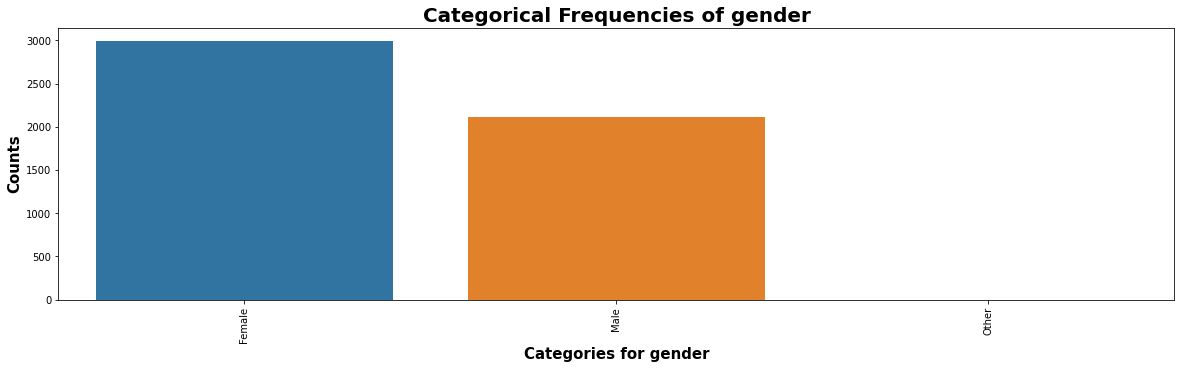

In [51]:
fig, ax = plot_bar(df, 'gender', 'gender');
print(df['gender'].value_counts())

Yes    3353
No     1757
Name: ever_married, dtype: int64


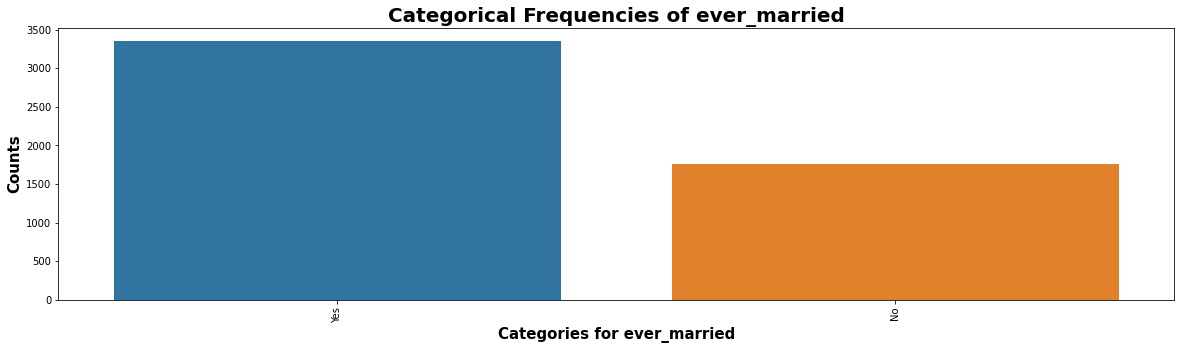

In [52]:
fig, ax = plot_bar(df, 'ever_married', 'ever_married');
print(df['ever_married'].value_counts())

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


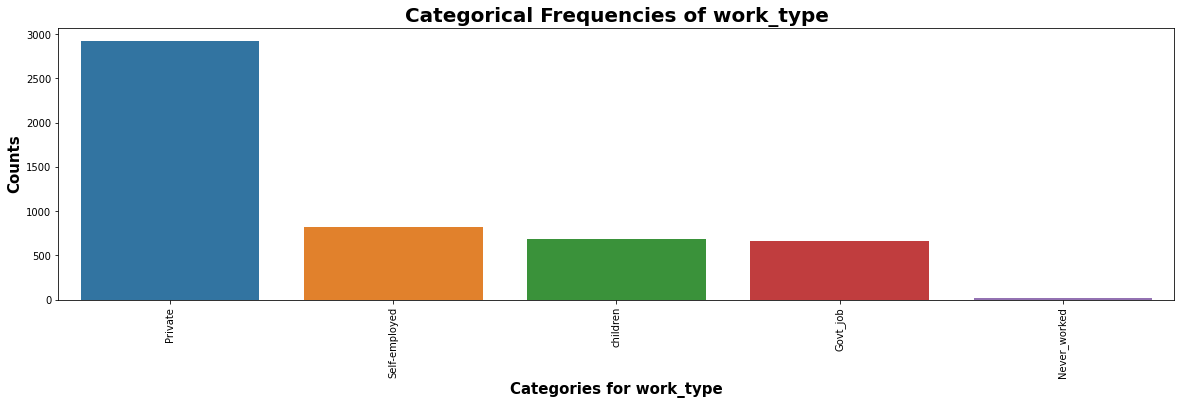

In [53]:
fig, ax = plot_bar(df, 'work_type', 'work_type');
print(df['work_type'].value_counts())

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


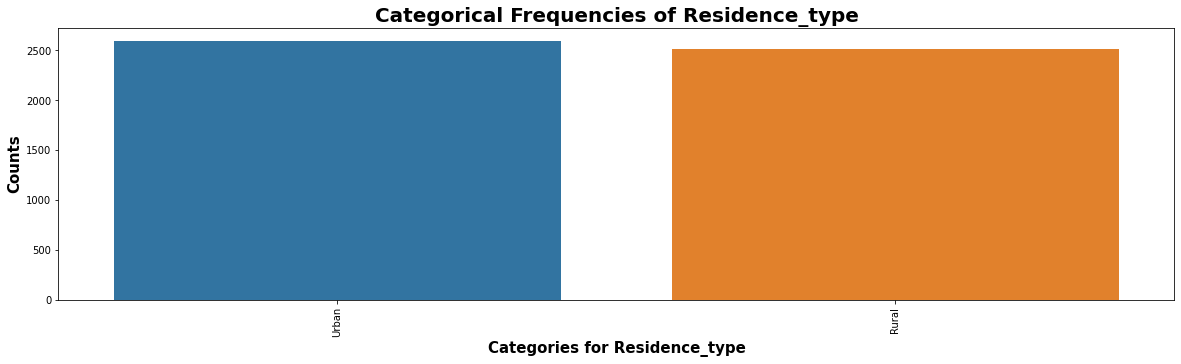

In [54]:
fig, ax = plot_bar(df, 'Residence_type', 'Residence_type');
print(df['Residence_type'].value_counts())

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


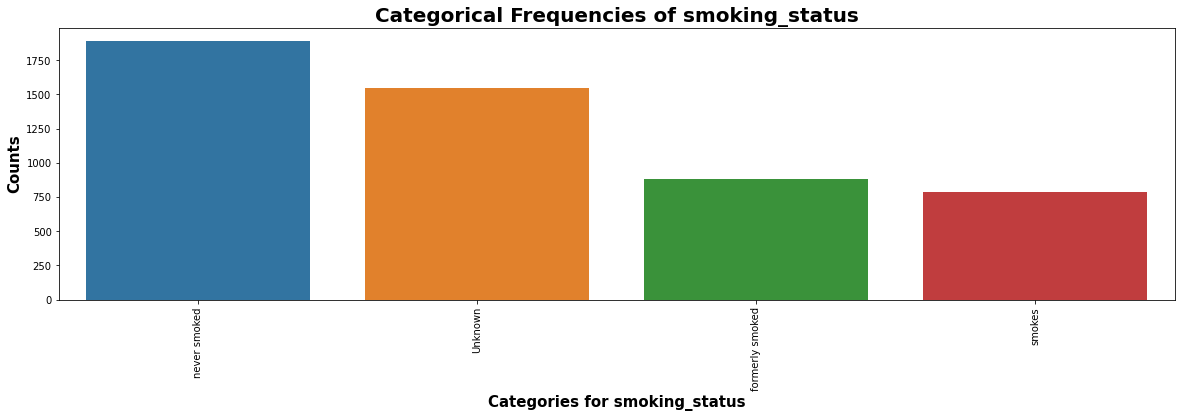

In [55]:
fig, ax = plot_bar(df, 'smoking_status', 'smoking_status');
print(df['smoking_status'].value_counts())